## Breast Cancer using Tensorflow & Keras

### Import the libraries

In [60]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Load dataset

In [61]:
cancer = load_breast_cancer()

In [62]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [63]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [64]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [65]:
len(cancer.feature_names)

30

In [66]:
df = pd.DataFrame(cancer.data[:, 0:2], columns=cancer.feature_names[0:2])

In [67]:
df

,mean radius,mean texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34
...,...,...
564,21.56,22.39
565,20.13,28.25
566,16.60,28.08
567,20.60,29.33


In [68]:
df['class'] = cancer.target

In [69]:
df

,mean radius,mean texture,class
0,17.99,10.38,0
1,20.57,17.77,0
2,19.69,21.25,0
3,11.42,20.38,0
4,20.29,14.34,0
...,...,...,...
564,21.56,22.39,0
565,20.13,28.25,0
566,16.60,28.08,0
567,20.60,29.33,0


In [70]:
df.sample(5, random_state=1)

,mean radius,mean texture,class
421,14.69,13.98,1
47,13.17,18.66,0
292,12.95,16.02,1
186,18.31,18.58,0
414,15.13,29.81,0


In [71]:
# df['class'] = np.where(df['class'] == 0, 'yes', 'no')
# df['class'] = np.where(df['class'] == 0, 'malignant', 'benign')
target_map = {0: 'malignant', 1: 'benign'}
df['class'] = df['class'].map(target_map)

In [72]:
df.sample(5, random_state=1)

,mean radius,mean texture,class
421,14.69,13.98,benign
47,13.17,18.66,malignant
292,12.95,16.02,benign
186,18.31,18.58,malignant
414,15.13,29.81,malignant


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mean radius   569 non-null    float64
 1   mean texture  569 non-null    float64
 2   class         569 non-null    object 
dtypes: float64(2), object(1)
memory usage: 13.5+ KB


In [74]:
df.isnull().sum()

mean radius     0
mean texture    0
class           0
dtype: int64

### Data Exploration

<AxesSubplot:xlabel='mean radius', ylabel='mean texture'>

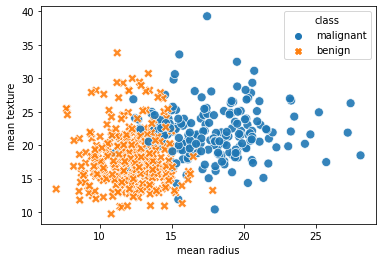

In [75]:
sns.scatterplot(x='mean radius', y='mean texture', data=df, hue='class', style='class', alpha=0.9, edgecolor='w', s=80)

### Label Encoding

In [76]:
class_names,y = np.unique(df['class'], return_inverse=True)

In [77]:
class_names

array(['benign', 'malignant'], dtype=object)

In [78]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [79]:
y[40:50]

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [80]:
X = df.drop('class', axis=1)

In [81]:
X

,mean radius,mean texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34
...,...,...
564,21.56,22.39
565,20.13,28.25
566,16.60,28.08
567,20.60,29.33


### Feature Scaling

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
sc = StandardScaler()

In [84]:
X_sc = sc.fit_transform(X)

In [85]:
X_sc[:5]

array([[ 1.09706398, -2.07333501],
       [ 1.82982061, -0.35363241],
       [ 1.57988811,  0.45618695],
       [-0.76890929,  0.25373211],
       [ 1.75029663, -1.15181643]])

### Visualization after scailed

<AxesSubplot:title={'center':'Before StandardScale (Raw data)'}, xlabel='mean radius', ylabel='Density'>

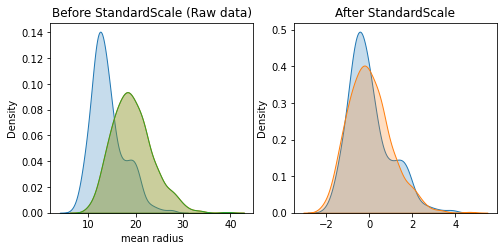

In [86]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 3.5))
ax1.set_title('Before StandardScale (Raw data)')
sns.kdeplot(df['mean radius'], fill=True, ax=ax1)
sns.kdeplot(df['mean texture'], fill=True, ax=ax1)

ax2.set_title('After StandardScale')
sns.kdeplot(X_sc[:,0], fill=True, ax=ax2)
sns.kdeplot(X_sc[:,1], fill=True, ax=ax2)
sns.kdeplot(df['mean texture'], fill=True, ax=ax1)

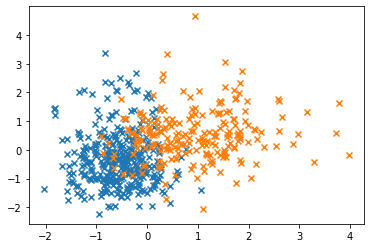

In [87]:
plt.scatter(X_sc[:, 0][y==0], X_sc[:, 1][y==0], marker='x')
plt.scatter(X_sc[:, 0][y==1], X_sc[:, 1][y==1], marker='x')

### Turn dataset into training set & test set

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.25, random_state=1)

In [90]:
X_train.shape, X_test.shape

((426, 2), (143, 2))

In [91]:
y_train.shape, y_test.shape

((426,), (143,))

In [92]:
X_train[:5]

array([[ 0.31034466,  2.63664885],
       [ 0.23650097, -0.04413248],
       [ 0.15697699,  0.19555543],
       [-1.0813249 , -0.68407594],
       [-0.64678318, -0.42577149]])

In [93]:
y_train[:5]

array([1, 0, 1, 0, 0], dtype=int64)

### training data

In [94]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

#### create

In [95]:
model = Sequential()

In [96]:
model.add(Dense(units=32, activation='relu', input_shape=(2,)))

In [97]:
model.add(Dense(units=1, activation='sigmoid'))

In [98]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [99]:
model.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 2),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_2_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_2',
    'trainable': True,
    'batch_input_shape': (None, 2),
    'dtype': 'float32',
    'units': 32,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_3',
    'trainable': True,
    'dtype': 'float32',
    'units': 1,
    'activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_

In [100]:
model.output_shape

(None, 1)

#### Compile

In [101]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Trainig ANN 

In [102]:
import time
start = time.time()
history = model.fit(X_train, y_train, epochs=20, verbose=1, batch_size=32, validation_split=0.25)
end = time.time()
print('Time Taken: {:.3f} secs'.format(end-start))

Epoch 1/20
10/10 [==============================] - 1s 32ms/step - loss: 0.6866 - accuracy: 0.3668 - val_loss: 0.6784 - val_accuracy: 0.3925
Epoch 2/20
10/10 [==============================] - 0s 7ms/step - loss: 0.6508 - accuracy: 0.3824 - val_loss: 0.6466 - val_accuracy: 0.4299
Epoch 3/20
10/10 [==============================] - 0s 7ms/step - loss: 0.6192 - accuracy: 0.4577 - val_loss: 0.6176 - val_accuracy: 0.5701
Epoch 4/20
10/10 [==============================] - 0s 8ms/step - loss: 0.5901 - accuracy: 0.6019 - val_loss: 0.5914 - val_accuracy: 0.7103
Epoch 5/20
10/10 [==============================] - 0s 5ms/step - loss: 0.5635 - accuracy: 0.7367 - val_loss: 0.5675 - val_accuracy: 0.7757
Epoch 6/20
10/10 [==============================] - 0s 5ms/step - loss: 0.5395 - accuracy: 0.8150 - val_loss: 0.5456 - val_accuracy: 0.8318
Epoch 7/20
10/10 [==============================] - 0s 6ms/step - loss: 0.5177 - accuracy: 0.8558 - val_loss: 0.5248 - val_accuracy: 0.8411
Epoch 8/20
10/10 [=

In [103]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.39626795053482056
Test accuracy: 0.8391608595848083


In [104]:
y_pred_pr = model.predict(X_test)

In [105]:
y_pred_pr[:4]

array([[0.2934535 ],
       [0.30876794],
       [0.25182402],
       [0.8909172 ]], dtype=float32)

In [106]:
y_pred_pr = (y_pred_pr > 0.5).astype(int)

In [107]:
y_pred_pr

array([[0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
    

### Model Performance 

In [108]:
from sklearn.metrics import classification_report, confusion_matrix

In [109]:
print('Score ->', score[1])
print(classification_report(y_test, y_pred_pr, target_names=class_names))
print(confusion_matrix(y_test, y_pred_pr))

Score -> 0.8391608595848083
              precision    recall  f1-score   support

      benign       0.87      0.86      0.87        88
   malignant       0.79      0.80      0.79        55

    accuracy                           0.84       143
   macro avg       0.83      0.83      0.83       143
weighted avg       0.84      0.84      0.84       143

[[76 12]
 [11 44]]


### Plotting Loss Curve 

In [110]:
df_hist = pd.DataFrame(history.history)

In [111]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 10}

In [112]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Loss')

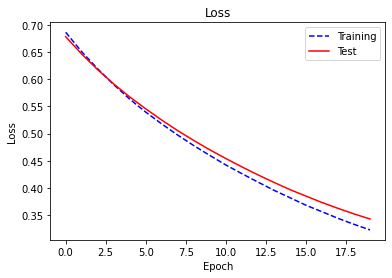

In [113]:
df_hist['loss'].plot(style='b--', label='Training')
df_hist['val_loss'].plot(style='r-', label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

Text(0.5, 1.0, 'model accuracy')

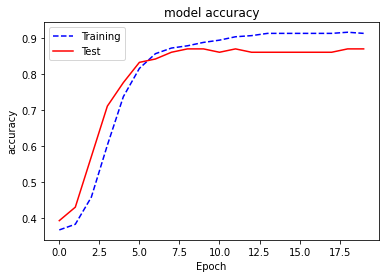

In [121]:
df_hist['accuracy'].plot(style='b--', label='Training')
df_hist['val_accuracy'].plot(style='r-', label='Test')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.title('model accuracy')

### Use Tensor Board

In [114]:
from keras.callbacks import TensorBoard

In [122]:
history = model.fit(X_train, y_train, epochs=30, verbose=1, batch_size=32, validation_split=0.25,callbacks=[TensorBoard(log_dir='./log')])

Epoch 1/30
10/10 [==============================] - 0s 19ms/step - loss: 0.2124 - accuracy: 0.9154 - val_loss: 0.2446 - val_accuracy: 0.8972
Epoch 2/30
10/10 [==============================] - 0s 8ms/step - loss: 0.2118 - accuracy: 0.9154 - val_loss: 0.2441 - val_accuracy: 0.8972
Epoch 3/30
10/10 [==============================] - 0s 7ms/step - loss: 0.2112 - accuracy: 0.9154 - val_loss: 0.2432 - val_accuracy: 0.8972
Epoch 4/30
10/10 [==============================] - 0s 6ms/step - loss: 0.2105 - accuracy: 0.9154 - val_loss: 0.2424 - val_accuracy: 0.8972
Epoch 5/30
10/10 [==============================] - 0s 7ms/step - loss: 0.2099 - accuracy: 0.9154 - val_loss: 0.2417 - val_accuracy: 0.8972
Epoch 6/30
10/10 [==============================] - 0s 7ms/step - loss: 0.2093 - accuracy: 0.9154 - val_loss: 0.2414 - val_accuracy: 0.8972
Epoch 7/30
10/10 [==============================] - 0s 7ms/step - loss: 0.2089 - accuracy: 0.9154 - val_loss: 0.2408 - val_accuracy: 0.8972
Epoch 8/30
10/10 [=

In [123]:
%load_ext tensorboard
%tensorboard --logdir ./log

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 12056), started 0:15:26 ago. (Use '!kill 12056' to kill it.)

### Plot Decision regions

In [124]:
from mlxtend.plotting import plot_decision_regions

Text(0, 0.5, 'mean texture')

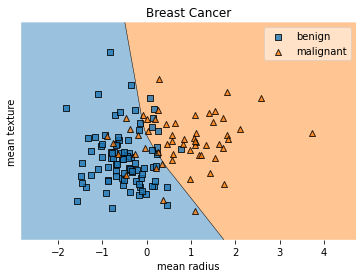

In [125]:
ax = plot_decision_regions(X_test, y_test, clf=model)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)

plt.title("Breast Cancer")
plt.yticks([])
plt.xlabel('mean radius')
plt.ylabel('mean texture')

### Predict new data

In [126]:
X_new = [[16.4, 14.1],
		 [18.5, 15.1]]

In [127]:
X_new_sc = sc.transform(X_new)

c:\Users\LENOVO LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [128]:
y_pred_pr = model.predict(X_new_sc)

In [146]:
y_pred = (y_pred_pr > 0.5).astype(int)

In [147]:
y_pred

array([[0],
       [1]])

In [148]:
print(class_names[y_pred])

[['benign']
 ['malignant']]


In [149]:
y_pred.shape

(2, 1)

### Plot decision region

In [150]:
y_pred = y_pred.reshape(1, -1)[0]

In [151]:
y_pred.shape

(2,)

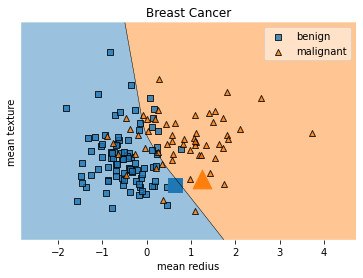

In [153]:
ax = plot_decision_regions(X_test, y_test, clf=model)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)
plt.title('Breast Cancer')
plt.yticks([])
plt.xlabel('mean redius')
plt.ylabel('mean texture')



# new data
plt.scatter(X_new_sc[:, 0][y_pred == 0], X_new_sc[:,1][y_pred == 0], marker='s', s=180)
plt.scatter(X_new_sc[:, 0][y_pred == 1], X_new_sc[:,1][y_pred == 1], marker='^', s=350)

### Saved Model

#### Two options
- .h5
- savedModel

In [154]:
model.save('./mymodel.h5') # .h5

In [155]:
model.save('./mymodels') # SavedModel

INFO:tensorflow:Assets written to: ./mymodels\assets


#### Scaler & Class names

In [156]:
import pickle

In [157]:
pickle.dump(sc, open('./scaler.pkl', 'wb'))

In [158]:
## save class name
file_name = "classname.pkl"
open_file = open(file_name, "wb")
pickle.dump(class_names, open_file)
open_file.close()

### load model and use it

In [159]:
from tensorflow.keras.models import load_model

In [160]:
my_model = load_model('./mymodels/')

In [161]:
my_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [162]:
my_model.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 2),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_2_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_2',
    'trainable': True,
    'batch_input_shape': (None, 2),
    'dtype': 'float32',
    'units': 32,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_3',
    'trainable': True,
    'dtype': 'float32',
    'units': 1,
    'activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_

### load Scaler

In [163]:
import pickle

In [165]:
sc2 = pickle.load(open('./scaler.pkl','rb'))

### Load Class names

In [167]:
file_name = "classname.pkl"
open_file = open(file_name, "rb")
class_names = pickle.load(open_file)
class_names

array(['benign', 'malignant'], dtype=object)

### Test model 

In [169]:
X_new2 =[[16.4, 14.1],
		[18.5, 15.1],
		[17.7, 18.7]]

In [170]:
X_new2_sc = sc2.transform(X_new2)

c:\Users\LENOVO LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [171]:
y_pred_pr = my_model.predict(X_new2_sc)

In [172]:
y_pred = (y_pred_pr > .5).astype(int)

In [173]:
y_pred

array([[0],
       [1],
       [1]])

In [174]:
print(class_names[y_pred])

[['benign']
 ['malignant']
 ['malignant']]


### plot decision region

In [175]:
y = y_pred.reshape(1, -1)[0]

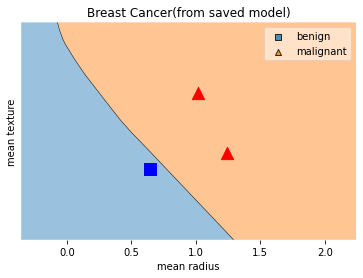

In [177]:
ax = plot_decision_regions(X_new2_sc, y , clf=my_model)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)

plt.title("Breast Cancer(from saved model)")
plt.yticks([])
plt.xlabel('mean radius')
plt.ylabel('mean texture')

plt.scatter(X_new2_sc[:, 0][y == 0], X_new2_sc[:, 1][y == 0], marker='s', s=150, c='b')
plt.scatter(X_new2_sc[:, 0][y == 1], X_new2_sc[:, 1][y == 1], marker='^', s=150, c='r')